# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты группы 0382 Морева Елена и Прибылов Никита

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

* _Дискретный сигнал:_

$x_0, x_1, x_2, ..., x_{N-1}$, получается при дискретизации аналогового сигнала $s(t)$

Будем считать, что отсчеты $x_k, k = 0,1,2,3, ..., N-1$ дискретного
сигнала получены в результате равномерной
дискретизации сигнала $s(t)$  с шагом дискретизации 1:

$x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если

$t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1$,
то рассматриваем

$\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате:

$\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

* _Спектр дискретного сигнала:_

$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$

* _Дискретное преобразование Фурье:_

Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле:

$X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$ или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \dfrac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

* _Формула численного дифференцирования для средней точки:_

$ y_n = \frac {s_{n+1}-s_{n-1}} {2h} $

* _Формула прямоугольников:_

$y_{n+1} = y_n + s_{n+1/2}$

* _Формула трапеций:_

$ y_{n+1}  = y_n + \frac 1 2(s_n + s_{n+1}) $


* _Формула Симпсона:_

$ y_{n+1} = y_{n-1} + \frac 1 3(s_{n-1} + 4s_n + s_{n+1}) $



## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft
import math
import random

### Пункт 1.

Формирование аналогового сигнала, который далее будет дискретизирован:

$s(t) = \displaystyle\sum_{k} A_k \cdot cos(\omega_kt+\varphi_k)$

$A_k$ определяется случайным образом из диапазона целых чисел от 1 до 11.

$\varphi_k$ является случайной величиной из промежутка от 0 до 0.5.

$\omega_k$ изменяется в пределах от 0 до $\pi$ с шагом $Δω=0.1\pi$.



In [ ]:
def sygnal(n):
    x = []
    y = []
    A_k = []
    s = []

    for i in range(n):
      x.append(40*i/n)
      y.append(0)

    for i in range(11):
      A_k.append(random.randint(1, 11))
      s.append(random.randint(0, 10000)/20000)

    for i in range(11):
      for j in range(n):

        y[j] += A_k[i]*math.cos(math.pi*i/10*x[j] + s[i])

    for i in range(len(y)):
      y[i] /= sum(A_k)

    return x, y

### Пункт 2

Визуализирование данных.


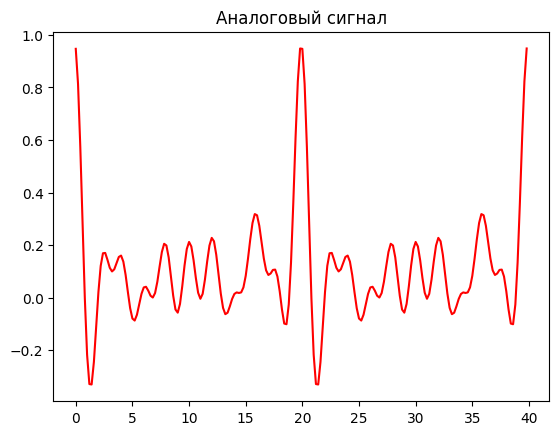

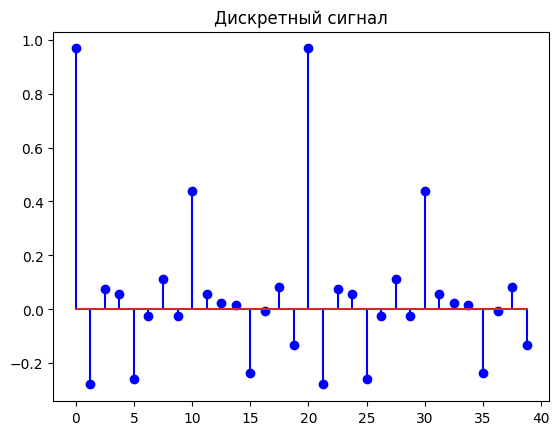

In [ ]:
xa, ya = sygnal(200)
plt.plot(xa, ya, 'r-')
plt.title("Аналоговый сигнал")
plt.show()
xd, yd = sygnal(32)
plt.stem(xd, yd, 'b-')
plt.title("Дискретный сигнал")
plt.show()

### Пункт 3.
С помощью ДПФ находятся дискретные отсчеты спектра дискретного сигнала.

Рассмотрим фрагмент последовательности $\{x_k\}$ из отсчётов $N$.

Результат - дискретная функция с периодом $NT$, где $T$ - период дискретизации:

$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$

Спектр $s(t)$ должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

Поскольку $s(t)$ - периодическая функция, допустимо разложение в ряд Фурье.


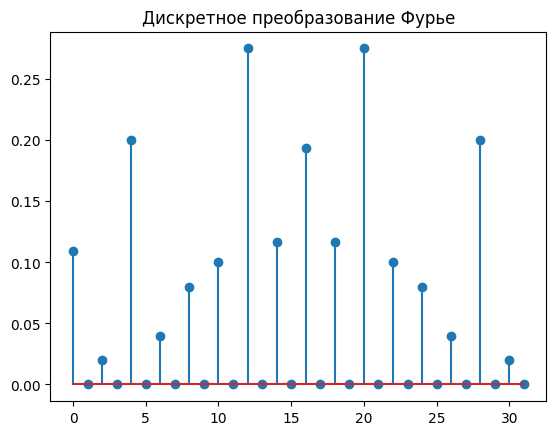

In [ ]:
def DFT():
  plt.stem(2*np.abs(fft(yd))/32)
  plt.title('Дискретное преобразование Фурье')
  plt.show()

DFT()

### Пункт 4.

Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам:

* Передаточные функции фильтра для 5 и 9 точек:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

* Формула для линейного сглаживания по 5 точкам и 9 точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$


In [ ]:
y_t = []
for i in range(5):
  y_t.append(1)
y_5 = np.convolve(yd, y_t, 'same') / 5

y_t = []
for i in range(9):
  y_t.append(1)
y_9 = np.convolve(yd, y_t, 'same') / 9

### Пункт 5.

Визуализация полученных результатов.

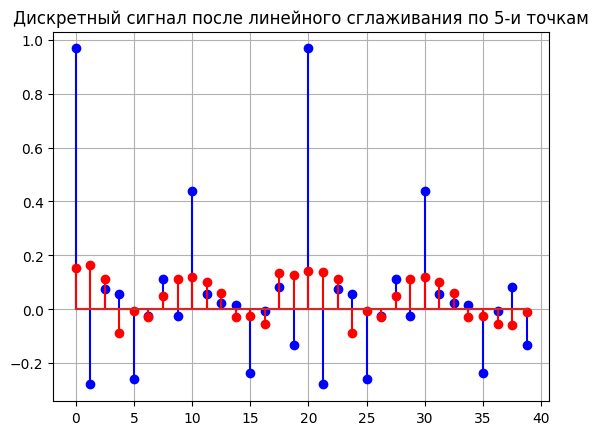

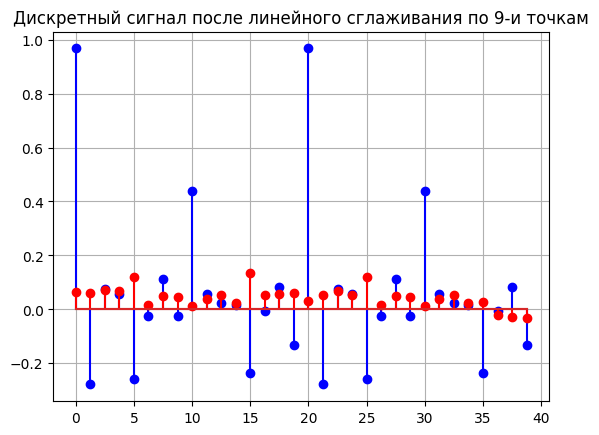

In [ ]:
plt.stem(xd, yd, 'b-', label="Исходный дискретный сигнал")
plt.stem(xd, y_5, "red", label="Дискретный сигнал после фильтрации")
plt.title("Дискретный сигнал после линейного сглаживания по 5-и точкам")
plt.grid()
plt.show()

plt.stem(xd, yd, 'b-', label="Исходный дискретный сигнал")
plt.stem(xd, y_9, "red", label="Дискретный сигнал после фильтрации")
plt.title("Дискретный сигнал после линейного сглаживания по 9-и точкам")
plt.grid()
plt.show()

### Пункт 6.

$\quad$С помощью дискретного преобразования Фурье (ДПФ) найдены дискретные отсчеты спектров дискретных сигналов после фильтрации:

In [ ]:
fy = 2*np.abs(fft(yd)) / len(fft(yd))
f_5 = 2 * np.abs(fft(y_5)) / len(fft(y_5))
f_9 = 2 * np.abs(fft(y_9)) / len(fft(y_9))

Визуализация полученных результатов:

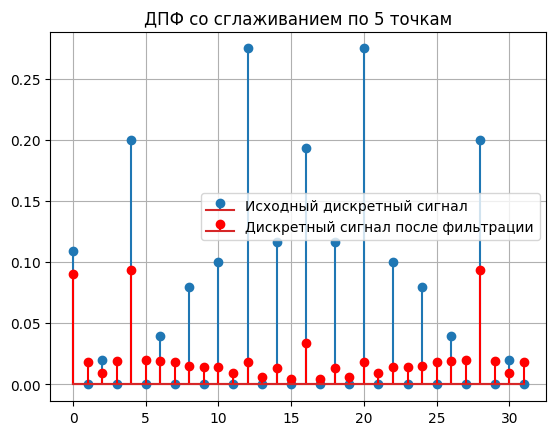

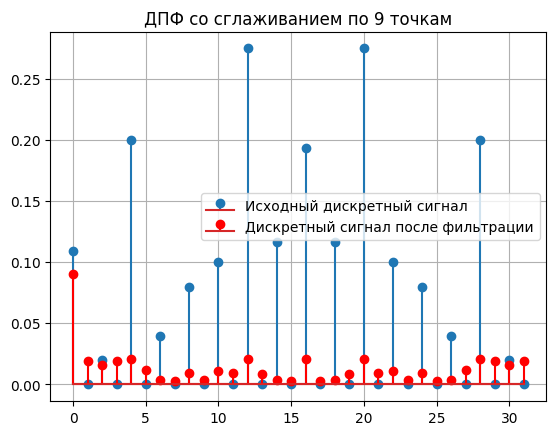

In [ ]:
plt.stem(fy, label="Исходный дискретный сигнал")
plt.stem(f_5, "red", label="Дискретный сигнал после фильтрации")
plt.title('ДПФ со сглаживанием по 5 точкам')
plt.grid()
plt.legend()
plt.show()


plt.stem(fy, label="Исходный дискретный сигнал")
plt.stem(f_9, "red", label="Дискретный сигнал после фильтрации")
plt.title('ДПФ со сглаживанием по 9 точкам')
plt.grid()
plt.legend()
plt.show()

### Пункт 7.

Анализ результатов:

1. Вид графиков спектра дискретного сигнала при сглаживании по 5-ти и 9-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
2. Без ослабления пропускается только сигнал постоянного уровня (нулевой частоты). С увеличением числа точек полоса пропускания становится уже.


### Пункт 8.



#### a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

Формула для численного дифференцирования 1-го порядка с шагом $h = 1$:

$y_n = \frac12(s_{n+1} - s_{n-1})$

Передаточная функции (частотной характеристики) фильтра:

$H(\omega) = i\sin\omega$

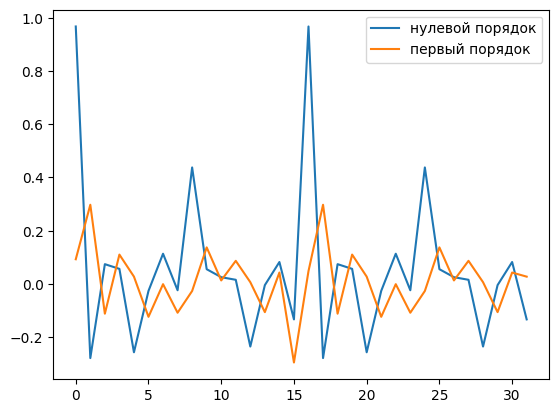

In [ ]:
y_ld1 = np.convolve(yd, [-1, 0, 1], 'same') / 3

plt.plot(yd, label='нулевой порядок')
plt.plot(y_ld1, label='первый порядок')
plt.legend()
plt.show()


Дискретные отсчеты спектров дискретных сигналов после фильтрации, найденные с помощью дискретного преобразования Фурье (ДПФ):

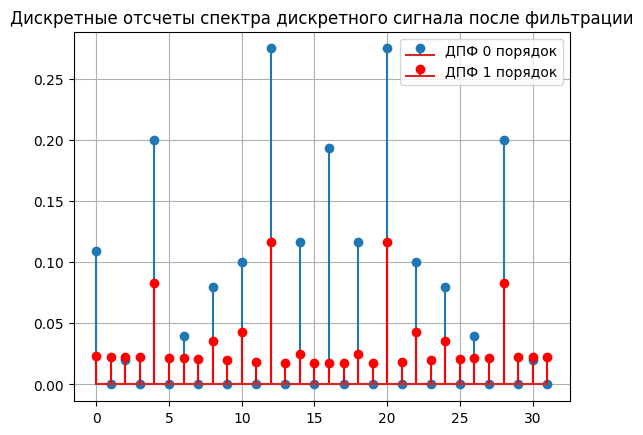

In [ ]:
fy_ld1 = 2 * np.abs(fft(y_ld1)) / len(fft(y_ld1))

plt.stem(fy, label='ДПФ 0 порядок')
plt.stem(fy_ld1, "red", label='ДПФ 1 порядок')
plt.title('Дискретные отсчеты спектра дискретного сигнала после фильтрации')
plt.grid()
plt.legend()
plt.show()


Анализ результатов:

По графику спектра видно, что средние частоты усиливаются, при этом низкие и высокие частоты сглаживаются, что соответствует значениям передаточной функции, так как она имеет форму синусоиды.

#### b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

* Формула прямоугольников:
$`$

    Передаточная функции (частотной характеристики) фильтра:

    $H(\omega) = \frac 1 {2isin(\frac \omega 2)}$
    $y_{n+1} = y_n + s_{n+1/2}$

    Передаточная функции (частотной характеристики) фильтра:

    $H(\omega) = \frac 1 {2isin(\frac \omega 2)}$

* Формула трапеций:

    $ y_{n+1}  = y_n + \frac 1 2(s_n + s_{n+1}) $

    Передаточная функция:

    $ H(\omega) = \frac {cos(\frac \omega 2)} {2isin(\frac \omega 2)}$

* Формула Симпсона:

    $ y_{n+1} = y_{n-1} + \frac 1 3(s_{n-1} + 4s_n + s_{n+1}) $

    Передаточная функция:

    $ H(\omega) = \frac {cos(\omega) + 2} {3isin(\omega)}$

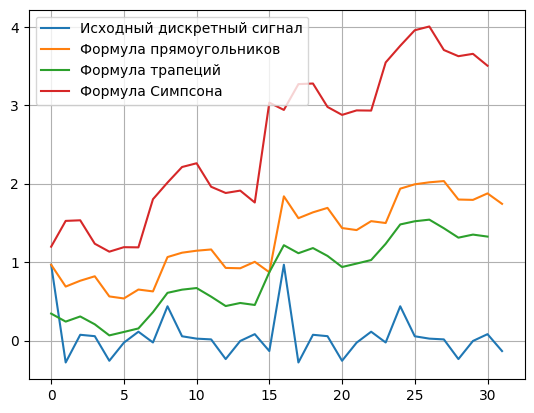

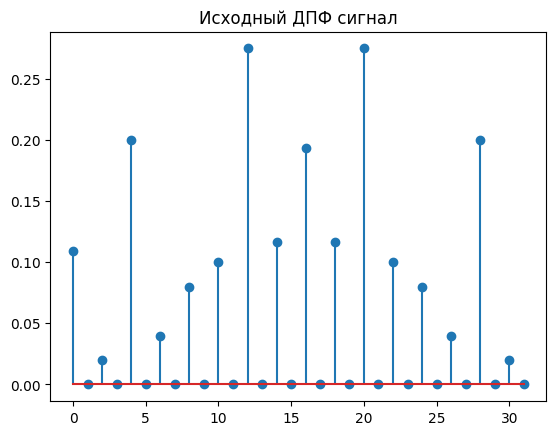

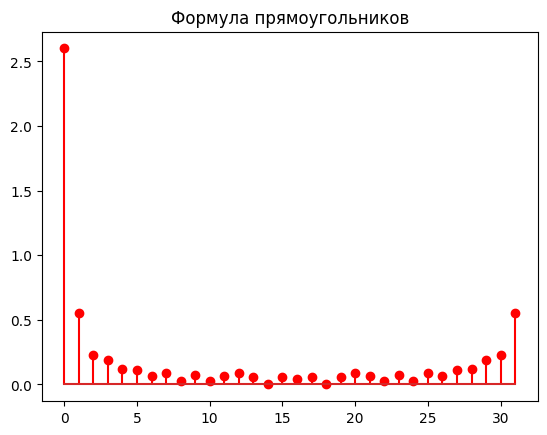

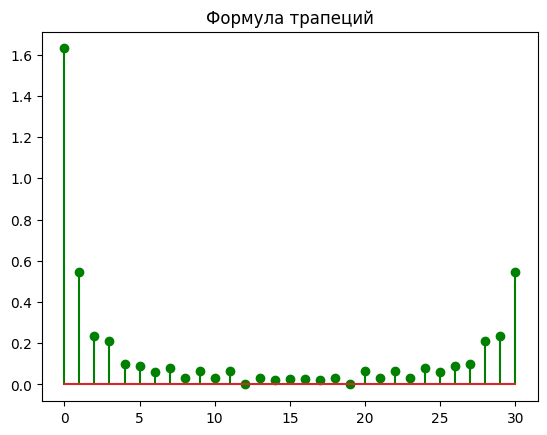

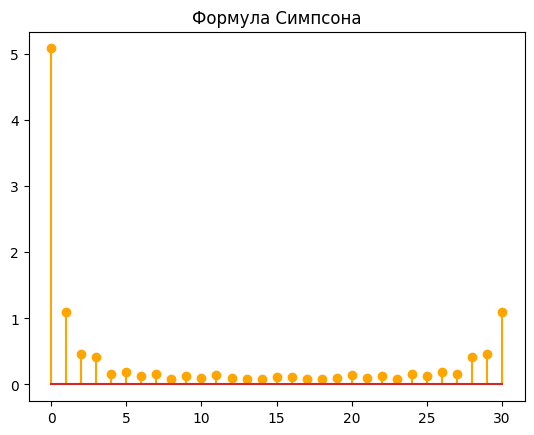

In [ ]:
def rect(f):
    val = []
    val.append(f[0])
    for i in f[1::]:
        val.append(val[-1] + i)
    return val

def trap(f):
    val = []
    val.append((f[0] + f[1])/2)
    for i in range(1, len(f)-1):
        val.append(val[-1] + (f[i] + f[i+1]) / 2)
    return val

def simpson(f):
    val = []
    val.append((4*f[0] + f[1])/3)
    for i in range(1, len(f)-1):
        val.append(val[-1] + (f[i-1] + f[i] + 4*f[i+1]) / 3)
    return val


y_r = rect(yd)
y_t = trap(yd)
y_s = simpson(yd)

plt.plot(yd, label="Исходный дискретный сигнал")
plt.plot(y_r, label="Формула прямоугольников")
plt.plot(y_t, label="Формула трапеций")
plt.plot(y_s, label="Формула Симпсона")
plt.legend()
plt.grid()
plt.show()


fy_r = 2 * np.abs(fft(y_r)) / len(fft(y_r))
fy_t = 2 * np.abs(fft(y_t)) / len(fft(y_t))
fy_s = 2 * np.abs(fft(y_s)) / len(fft(y_s))

plt.stem(fy)
plt.title('Исходный ДПФ сигнал')
plt.show()
plt.stem(fy_r, "red")
plt.title("Формула прямоугольников")
plt.show()
plt.stem(fy_t, "green")
plt.title("Формула трапеций")
plt.show()
plt.stem(fy_s, "orange")
plt.title("Формула Симпсона")
plt.show()


Анализ результатов:

1. При значении частоты, близком к нулю, все формулы усиливают сигнал.
2. Использование формулы трапеций усиливает низкие частоты больше других формул, при этом подавляет высокие частоты.
3. Использование формулы Симпсона, наоборот, усиливает высокие частоты.
4. В диапозоне средних частот все формулы подавляют сигнал.

Данные результаты соответствуют значениям передаточных функций.

## Выводы

В ходе выполнения данной работы был сгенерирован дискретный сигнал. К нему были применены линейное сглаживание по 5-ти и 9-ти точкам и фильтры, соответствующие численному дифференцированию 1-го порядка и численному интегрированию. Кроме этого, с помощью ДПФ были найдены дискретные отсчеты спектра для дискретного сигнала после его фильтраци и для исходного дискретного сигнала. Все полученные результаты фильтрации сигнала были визуализированы с помощью графиков, проанализированы и сопоставлены с исходным сигналом. Было выяснено, что спектр дискретного сигнала симметричен относительно 0, а спектры дискретного сигнала после его фильтрации соответствуют значениям передаточных функций фильтра.